In [111]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os as os

In [112]:
pov16 = pd.read_csv("Census Data/poverty2016.csv")
pov17 = pd.read_csv("Census Data/poverty2017.csv")
pov18 = pd.read_csv("Census Data/poverty2018.csv")
pov19 = pd.read_csv("Census Data/poverty2019.csv")
pov20 = pd.read_csv("Census Data/poverty2020.csv")
pov21 = pd.read_csv("Census Data/poverty2021.csv")

counties= gpd.read_file('NC_Counties/North_Carolina_State_and_County_Boundary_Polygons.geojson')



In [113]:
counties.columns

Index(['OBJECTID', 'County', 'FIPS', 'Rec_Survey', 'NCGS_url', 'ck_date',
       'Shape__Area', 'Shape__Length', 'GlobalID', 'geometry'],
      dtype='object')

In [114]:
old_column_name = 'County'
new_column_name = 'CO_NAME'

counties= counties.rename(columns={old_column_name: new_column_name})

counties.columns

counties[new_column_name]= counties[new_column_name].str.upper()


In [115]:
col_names = pov16.columns.to_list()
col_names

['Label (Grouping)',
 'North Carolina!!Total!!Estimate',
 'North Carolina!!Total!!Margin of Error',
 'North Carolina!!Below poverty level!!Estimate',
 'North Carolina!!Below poverty level!!Margin of Error',
 'North Carolina!!Percent below poverty level!!Estimate',
 'North Carolina!!Percent below poverty level!!Margin of Error',
 'Alamance County, North Carolina!!Total!!Estimate',
 'Alamance County, North Carolina!!Total!!Margin of Error',
 'Alamance County, North Carolina!!Below poverty level!!Estimate',
 'Alamance County, North Carolina!!Below poverty level!!Margin of Error',
 'Alamance County, North Carolina!!Percent below poverty level!!Estimate',
 'Alamance County, North Carolina!!Percent below poverty level!!Margin of Error',
 'Alexander County, North Carolina!!Total!!Estimate',
 'Alexander County, North Carolina!!Total!!Margin of Error',
 'Alexander County, North Carolina!!Below poverty level!!Estimate',
 'Alexander County, North Carolina!!Below poverty level!!Margin of Error',
 

In [116]:
to_rename = {' County, North Carolina!!Total!!Estimate':'_total',
             ' County, North Carolina!!Below poverty level!!Estimate':'_estimate',
             ' County, North Carolina!!Percent below poverty level!!Estimate':'_percentage'}
to_rename 

{' County, North Carolina!!Total!!Estimate': '_total',
 ' County, North Carolina!!Below poverty level!!Estimate': '_estimate',
 ' County, North Carolina!!Percent below poverty level!!Estimate': '_percentage'}

In [117]:
for key, value in to_rename.items():
    print (key)
    print(value)

 County, North Carolina!!Total!!Estimate
_total
 County, North Carolina!!Below poverty level!!Estimate
_estimate
 County, North Carolina!!Percent below poverty level!!Estimate
_percentage


In [118]:
for index,col in enumerate(col_names):
    for key, value in to_rename.items():
        col = col.replace(key, value)
    col_names[index] = col

In [119]:
pov16.columns = col_names # rename columns
pov17.columns = col_names
pov18.columns = col_names
pov19.columns = col_names
pov20.columns = col_names
pov21.columns = col_names
pov18.head() # check dataframe w renamed columns


,Label (Grouping),North Carolina!!Total!!Estimate,North Carolina!!Total!!Margin of Error,North Carolina!!Below poverty level!!Estimate,North Carolina!!Below poverty level!!Margin of Error,North Carolina!!Percent below poverty level!!Estimate,North Carolina!!Percent below poverty level!!Margin of Error,Alamance_total,"Alamance County, North Carolina!!Total!!Margin of Error",Alamance_estimate,...,Yadkin_estimate,"Yadkin County, North Carolina!!Below poverty level!!Margin of Error",Yadkin_percentage,"Yadkin County, North Carolina!!Percent below poverty level!!Margin of Error",Yancey_total,"Yancey County, North Carolina!!Total!!Margin of Error",Yancey_estimate,"Yancey County, North Carolina!!Below poverty level!!Margin of Error",Yancey_percentage,"Yancey County, North Carolina!!Percent below poverty level!!Margin of Error"
0,Population for whom poverty status is determined,"9,881,292","±1,522","1,523,949","±15,319",15.4%,±0.2,"156,158",±376,"26,264",...,"5,692",±797,15.3%,±2.1,"17,509",±66,"3,361",±481,19.2%,±2.7
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"2,258,876","±1,607","498,013","±7,632",22.0%,±0.3,"35,774",±167,"9,059",...,"2,008",±406,25.2%,±5.1,"3,271",±53,818,±222,25.0%,±6.8
3,Under 5 years,"594,448","±1,086","146,941","±2,622",24.7%,±0.4,"9,251",±82,"2,558",...,414,±141,21.3%,±7.2,815,±85,283,±134,34.7%,±15.4
4,5 to 17 years,"1,664,428","±1,621","351,072","±6,233",21.1%,±0.4,"26,523",±143,"6,501",...,"1,594",±333,26.5%,±5.5,"2,456",±99,535,±167,21.8%,±6.6


In [120]:
poverty_sex16 = pov16.iloc[[12,13]] 
poverty_sex16=poverty_sex16[poverty_sex16.columns.drop(list(poverty_sex16.filter(regex='!')))]

poverty_sex17 = pov17.iloc[[12,13]] 
poverty_sex17=poverty_sex17[poverty_sex17.columns.drop(list(poverty_sex17.filter(regex='!')))]

poverty_sex18 = pov18.iloc[[12,13]] 
poverty_sex18=poverty_sex18[poverty_sex18.columns.drop(list(poverty_sex18.filter(regex='!')))]

poverty_sex19 = pov19.iloc[[12,13]] 
poverty_sex19=poverty_sex19[poverty_sex19.columns.drop(list(poverty_sex19.filter(regex='!')))]

poverty_sex20 = pov20.iloc[[12,13]] 
poverty_sex20=poverty_sex20[poverty_sex20.columns.drop(list(poverty_sex20.filter(regex='!')))]

poverty_sex21 = pov21.iloc[[12,13]] 
poverty_sex21=poverty_sex21[poverty_sex21.columns.drop(list(poverty_sex21.filter(regex='!')))]









In [121]:
poverty_sex16 = poverty_sex16.T.reset_index() 
poverty_sex17 = poverty_sex17.T.reset_index() 
poverty_sex18 = poverty_sex18.T.reset_index() 
poverty_sex19 = poverty_sex19.T.reset_index() 
poverty_sex20 = poverty_sex20.T.reset_index() 
poverty_sex21 = poverty_sex21.T.reset_index() 
poverty_sex16

,index,12,13
0,Label (Grouping),Male,Female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
...,...,...,...
296,Yadkin_estimate,"3,349","3,763"
297,Yadkin_percentage,18.1%,19.8%
298,Yancey_total,"8,566","8,847"
299,Yancey_estimate,"1,692","2,021"


In [122]:
poverty_sex16.columns

Index(['index', 12, 13], dtype='object')

In [123]:
sex_cols = ["male","female"]

In [124]:
poverty_sex16.columns = ["counties"] + sex_cols 
poverty_sex17.columns = ['counties'] + sex_cols
poverty_sex18.columns = ['counties'] + sex_cols
poverty_sex19.columns = ['counties'] + sex_cols
poverty_sex20.columns = ['counties'] + sex_cols
poverty_sex21.columns = ['counties'] + sex_cols

poverty_sex16.columns

Index(['counties', 'male', 'female'], dtype='object')

In [125]:
poverty_sex16 = poverty_sex16.drop(poverty_sex16.index[0]) 
poverty_sex17 = poverty_sex17.drop(poverty_sex17.index[0]) 
poverty_sex18 = poverty_sex18.drop(poverty_sex18.index[0]) 
poverty_sex19 = poverty_sex19.drop(poverty_sex19.index[0]) 
poverty_sex20 = poverty_sex20.drop(poverty_sex20.index[0]) 
poverty_sex21 = poverty_sex21.drop(poverty_sex21.index[0]) 







poverty_sex16

,counties,male,female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
5,Alexander_estimate,"2,909","3,331"
...,...,...,...
296,Yadkin_estimate,"3,349","3,763"
297,Yadkin_percentage,18.1%,19.8%
298,Yancey_total,"8,566","8,847"
299,Yancey_estimate,"1,692","2,021"


In [126]:
poverty_sex16.head()

,counties,male,female
1,Alamance_total,"72,849","79,387"
2,Alamance_estimate,"12,060","16,063"
3,Alamance_percentage,16.6%,20.2%
4,Alexander_total,"17,807","18,145"
5,Alexander_estimate,"2,909","3,331"


In [127]:
poverty_sex16[poverty_sex16['counties'].str.contains('_percentage')]
poverty_sex17[poverty_sex17['counties'].str.contains('_percentage')]
poverty_sex18[poverty_sex18['counties'].str.contains('_percentage')]
poverty_sex19[poverty_sex19['counties'].str.contains('_percentage')]
poverty_sex20[poverty_sex20['counties'].str.contains('_percentage')]
poverty_sex21[poverty_sex21['counties'].str.contains('_percentage')]


,counties,male,female
3,Alamance_percentage,12.6%,15.9%
6,Alexander_percentage,10.5%,12.6%
9,Alleghany_percentage,20.1%,22.7%
12,Anson_percentage,15.9%,20.6%
15,Ashe_percentage,13.4%,14.5%
...,...,...,...
288,Wayne_percentage,16.6%,20.5%
291,Wilkes_percentage,14.8%,19.8%
294,Wilson_percentage,18.3%,19.4%
297,Yadkin_percentage,14.6%,16.2%


In [128]:
poverty_sex_perc16 = poverty_sex16[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc16 = poverty_sex_perc16.replace('%', '', regex=True)

poverty_sex_perc17 = poverty_sex17[poverty_sex17['counties'].str.contains('_percentage')].copy()
poverty_sex_perc17 = poverty_sex_perc17.replace('%', '', regex=True)

poverty_sex_perc18 = poverty_sex18[poverty_sex18['counties'].str.contains('_percentage')].copy()
poverty_sex_perc18 = poverty_sex_perc18.replace('%', '', regex=True)

poverty_sex_perc19 = poverty_sex19[poverty_sex19['counties'].str.contains('_percentage')].copy()
poverty_sex_perc19 = poverty_sex_perc19.replace('%', '', regex=True)

poverty_sex_perc20 = poverty_sex20[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc20 = poverty_sex_perc20.replace('%', '', regex=True)

poverty_sex_perc21 = poverty_sex21[poverty_sex16['counties'].str.contains('_percentage')].copy()
poverty_sex_perc21 = poverty_sex_perc21.replace('%', '', regex=True)

poverty_sex_perc16

,counties,male,female
3,Alamance_percentage,16.6,20.2
6,Alexander_percentage,16.3,18.4
9,Alleghany_percentage,16.4,22.4
12,Anson_percentage,20.8,24.8
15,Ashe_percentage,20.0,19.9
...,...,...,...
288,Wayne_percentage,19.7,23.8
291,Wilkes_percentage,19.7,22.4
294,Wilson_percentage,20.8,24.0
297,Yadkin_percentage,18.1,19.8


In [129]:
poverty_sex_perc16.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc16.counties.to_list()]
poverty_sex_perc17.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc17.counties.to_list()]
poverty_sex_perc18.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc18.counties.to_list()]
poverty_sex_perc19.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc19.counties.to_list()]
poverty_sex_perc20.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc20.counties.to_list()]
poverty_sex_perc21.loc[:,"CO_NAME"] = [n.replace('_percentage','').upper() for n in poverty_sex_perc21.counties.to_list()]








poverty_sex_perc16

,counties,male,female,CO_NAME
3,Alamance_percentage,16.6,20.2,ALAMANCE
6,Alexander_percentage,16.3,18.4,ALEXANDER
9,Alleghany_percentage,16.4,22.4,ALLEGHANY
12,Anson_percentage,20.8,24.8,ANSON
15,Ashe_percentage,20.0,19.9,ASHE
...,...,...,...,...
288,Wayne_percentage,19.7,23.8,WAYNE
291,Wilkes_percentage,19.7,22.4,WILKES
294,Wilson_percentage,20.8,24.0,WILSON
297,Yadkin_percentage,18.1,19.8,YADKIN


In [130]:
plot_2016 = counties.merge(poverty_sex_perc16, how='inner', on='CO_NAME')
plot_2017 = counties.merge(poverty_sex_perc17, how='inner', on='CO_NAME')
plot_2018 = counties.merge(poverty_sex_perc18, how='inner', on='CO_NAME')
plot_2019 = counties.merge(poverty_sex_perc19, how='inner', on='CO_NAME')
plot_2020 = counties.merge(poverty_sex_perc20, how='inner', on='CO_NAME')
plot_2021 = counties.merge(poverty_sex_perc21, how='inner', on='CO_NAME')

plot_2016

,OBJECTID,CO_NAME,FIPS,Rec_Survey,NCGS_url,ck_date,Shape__Area,Shape__Length,GlobalID,geometry,counties,male,female
0,1,CAMDEN,029,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,8.650426e+09,680450.731781,90044997-3e45-4fb9-868b-d63e35ca5417,"POLYGON ((-75.90629 36.08588, -75.90663 36.085...",Camden_percentage,9.6,11.1
1,2,GATES,073,No recent survey data available,,2011-11-29 00:00:00+00:00,9.640705e+09,444604.369559,9481c531-a035-4ef5-b744-7ea6c273dc2f,"POLYGON ((-76.69658 36.29619, -76.69673 36.296...",Gates_percentage,10.1,13.9
2,3,IREDELL,097,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.667062e+10,639632.141435,af176728-342a-4e27-98c7-a3618a76f75d,"POLYGON ((-80.94812 35.49117, -80.94835 35.491...",Iredell_percentage,11.3,15.3
3,4,WILKES,193,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,2.111175e+10,718209.059123,ff004293-a701-4db2-9992-0746fca95bd3,"POLYGON ((-81.30257 36.00491, -81.30285 36.004...",Wilkes_percentage,19.7,22.4
4,5,UNION,179,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.782795e+10,584449.934640,64144070-8f48-4c5f-ac8e-356806056303,"POLYGON ((-80.55036 35.20841, -80.55007 35.208...",Union_percentage,8.9,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,SURRY,171,No recent survey data available,,2011-11-29 00:00:00+00:00,1.499126e+10,575219.788947,b16703ae-38b8-4e5a-89bc-0df95c91fc07,"POLYGON ((-80.45233 36.24143, -80.45259 36.241...",Surry_percentage,16.8,18.8
96,97,HERTFORD,091,No recent survey data available,,2011-11-29 00:00:00+00:00,1.004846e+10,588862.054851,288b0028-fa86-4b36-99d4-1b0e40c573f5,"POLYGON ((-76.70659 36.24380, -76.70693 36.243...",Hertford_percentage,22.0,26.3
97,98,STOKES,169,No recent survey data available,,2011-11-29 00:00:00+00:00,1.270900e+10,453418.519272,19c14f88-a2b2-4fbe-ac8a-58396a51cbae,"POLYGON ((-80.03512 36.25719, -80.03547 36.257...",Stokes_percentage,14.1,16.6
98,99,ASHE,009,No recent survey data available,,2011-11-29 00:00:00+00:00,1.193919e+10,520045.398397,af0b3578-18ca-468a-be2b-dc3958db6c4f,"POLYGON ((-81.47752 36.24026, -81.48632 36.241...",Ashe_percentage,20.0,19.9


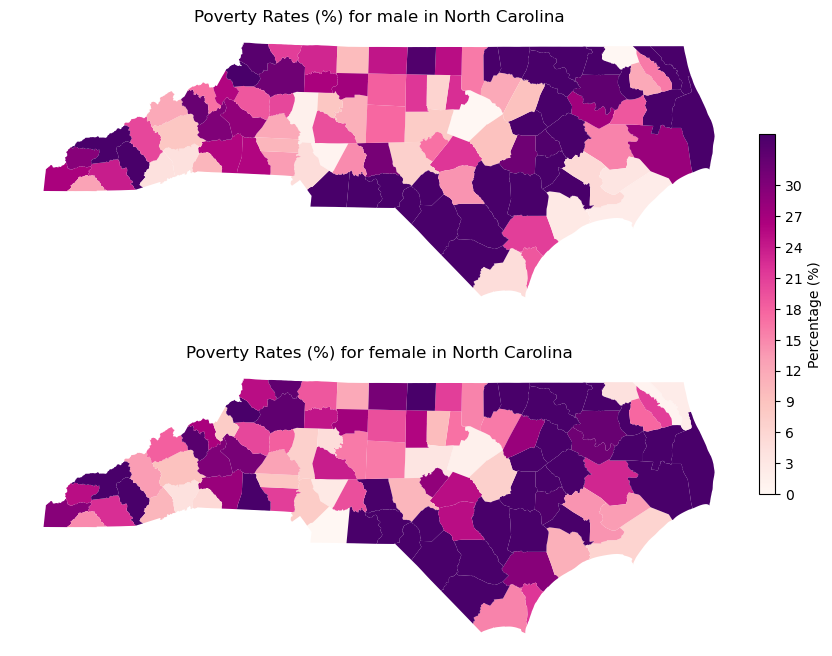

In [131]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2016.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

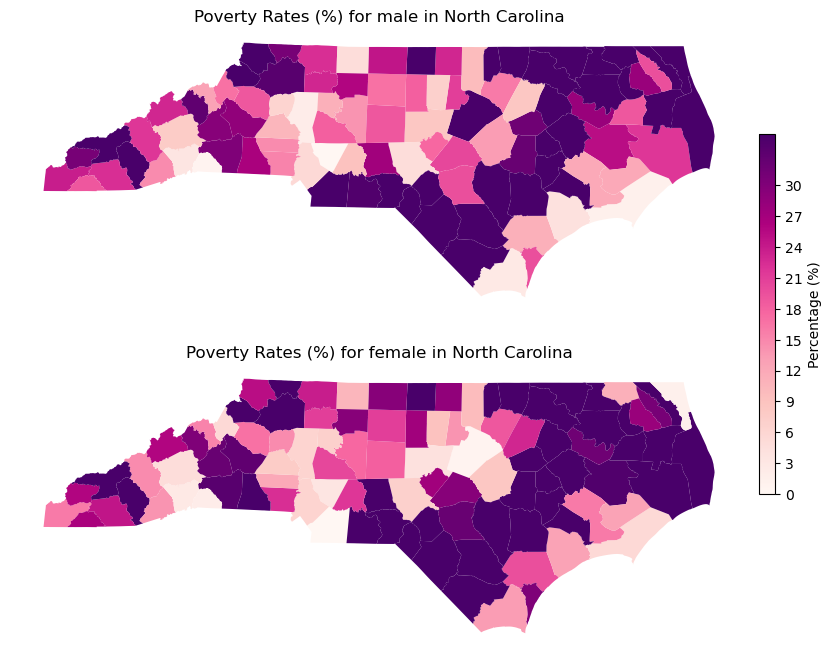

In [132]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2017.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

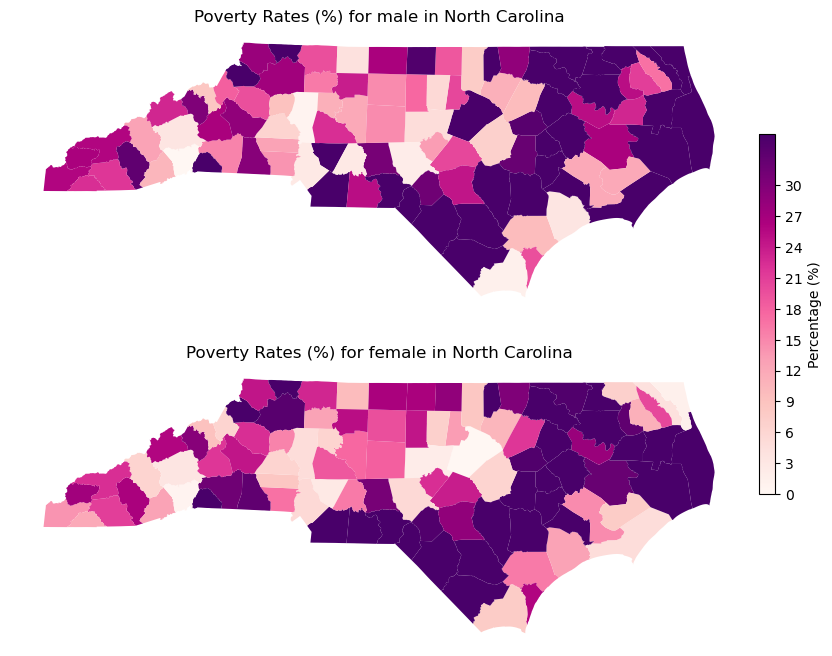

In [133]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2018.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

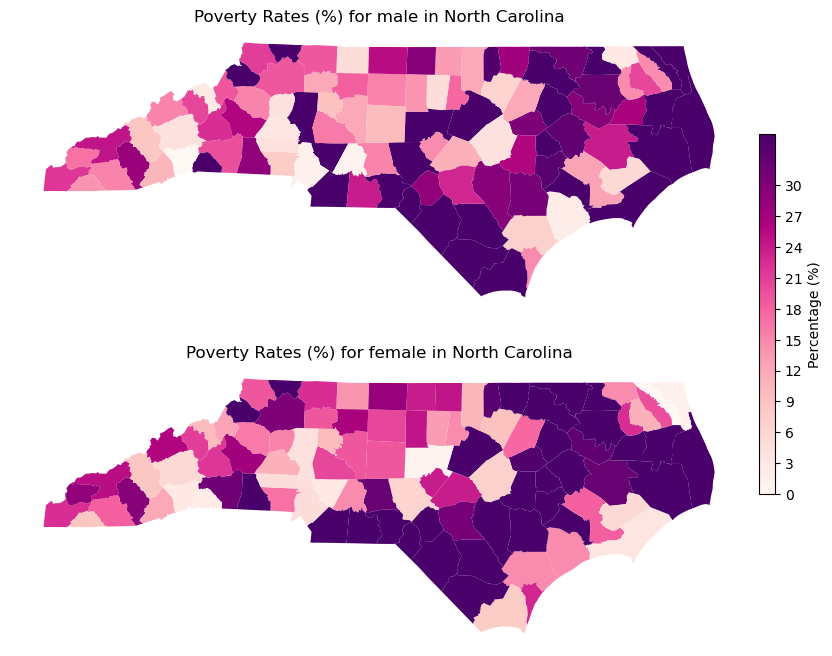

In [134]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2019.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

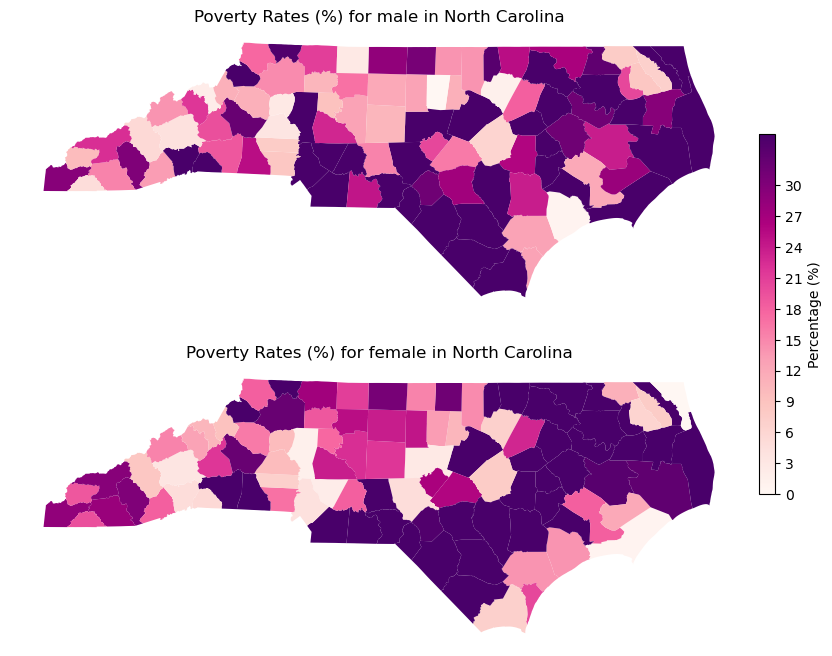

In [135]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2020.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

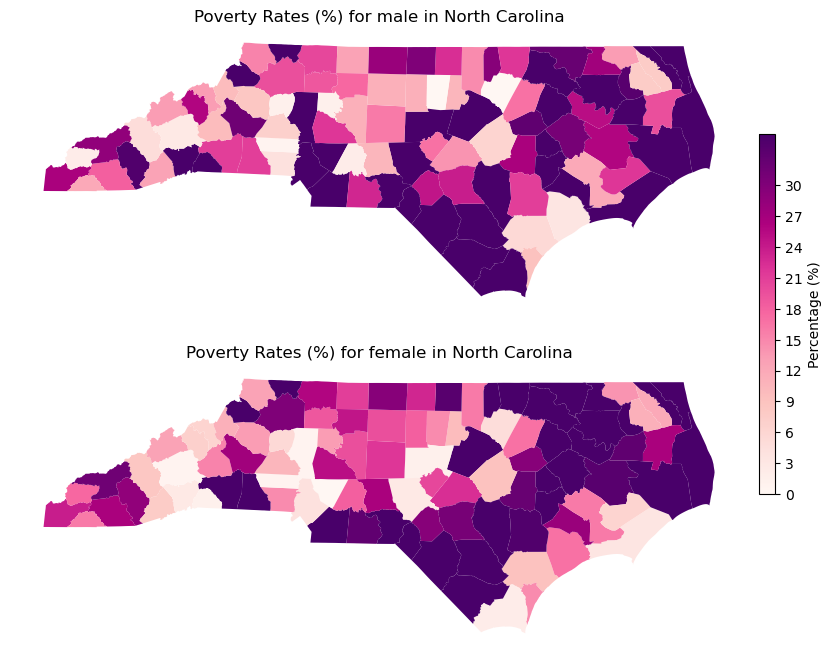

In [136]:
num_levels= 100
fig, axes = plt.subplots(nrows=2, ncols=1,figsize = (16, 8))
for index,ax in enumerate(axes.flat):
    im = plot_2021.plot(column = sex_cols[index], ax = ax, cmap = "RdPu", vmin=0, vmax=50)
    im.set_title(f'Poverty Rates (%) for {sex_cols[index]} in North Carolina', fontdict = {'fontsize': '12', 'fontweight' : '2'})
    im.set_axis_off()
    
cax = fig.add_axes([0.75, 0.3, 0.01, 0.45])
sm = plt.cm.ScalarMappable(cmap="RdPu", norm=plt.Normalize(vmin=0, vmax=35))
cbar = fig.colorbar(sm, cax=cax, ticks=[i for i in range(0, 31, 3)])
cbar.set_label('Percentage (%)')

In [137]:
econ2016= pd.read_csv("Economic Impact/NCecon2016.csv")
econ2017 = pd.read_csv("Economic Impact/NCecon2017.csv")
econ2018 = pd.read_csv("Economic Impact/NCecon2018.csv")
econ2019 = pd.read_csv("Economic Impact/NCecon2019.csv")
econ2020 = pd.read_csv("Economic Impact/NCecon2020.csv")
econ2021 = pd.read_csv("Economic Impact/NCecon2021.csv")



In [138]:
econ2016 = counties.merge(econ2016, how='inner', on='CO_NAME')
econ2017 = counties.merge(econ2017, how='inner', on='CO_NAME')
econ2018 = counties.merge(econ2018, how='inner', on='CO_NAME')
econ2019 = counties.merge(econ2019, how='inner', on='CO_NAME')
econ2020 = counties.merge(econ2020, how='inner', on='CO_NAME')
econ2021 = counties.merge(econ2021, how='inner', on='CO_NAME')



In [139]:
econ2016 = econ2016.replace('%', '', regex=True)
econ2017 = econ2017.replace('%', '', regex=True)
econ2018 = econ2018.replace('%', '', regex=True)
econ2019 = econ2019.replace('%', '', regex=True)
econ2020 = econ2020.replace('%', '', regex=True)
econ2021 = econ2021.replace('%', '', regex=True)


econ2017.columns

Index(['OBJECTID', 'CO_NAME', 'FIPS', 'Rec_Survey', 'NCGS_url', 'ck_date',
       'Shape__Area', 'Shape__Length', 'GlobalID', 'geometry',
       'Expenditure (Millions) ', 'Expenditure Percent Change 2016/2017'],
      dtype='object')

In [140]:
econ2017


,OBJECTID,CO_NAME,FIPS,Rec_Survey,NCGS_url,ck_date,Shape__Area,Shape__Length,GlobalID,geometry,Expenditure (Millions),Expenditure Percent Change 2016/2017
0,1,CAMDEN,029,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,8.650426e+09,680450.731781,90044997-3e45-4fb9-868b-d63e35ca5417,"POLYGON ((-75.90629 36.08588, -75.90663 36.085...",2.09,0.04
1,2,GATES,073,No recent survey data available,,2011-11-29 00:00:00+00:00,9.640705e+09,444604.369559,9481c531-a035-4ef5-b744-7ea6c273dc2f,"POLYGON ((-76.69658 36.29619, -76.69673 36.296...",6.47,0.04
2,3,IREDELL,097,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.667062e+10,639632.141435,af176728-342a-4e27-98c7-a3618a76f75d,"POLYGON ((-80.94812 35.49117, -80.94835 35.491...",253.72,0.02
3,4,WILKES,193,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,2.111175e+10,718209.059123,ff004293-a701-4db2-9992-0746fca95bd3,"POLYGON ((-81.30257 36.00491, -81.30285 36.004...",78.08,0.04
4,5,UNION,179,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.782795e+10,584449.934640,64144070-8f48-4c5f-ac8e-356806056303,"POLYGON ((-80.55036 35.20841, -80.55007 35.208...",139.75,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,SURRY,171,No recent survey data available,,2011-11-29 00:00:00+00:00,1.499126e+10,575219.788947,b16703ae-38b8-4e5a-89bc-0df95c91fc07,"POLYGON ((-80.45233 36.24143, -80.45259 36.241...",125.59,0.05
96,97,HERTFORD,091,No recent survey data available,,2011-11-29 00:00:00+00:00,1.004846e+10,588862.054851,288b0028-fa86-4b36-99d4-1b0e40c573f5,"POLYGON ((-76.70659 36.24380, -76.70693 36.243...",29.99,0.02
97,98,STOKES,169,No recent survey data available,,2011-11-29 00:00:00+00:00,1.270900e+10,453418.519272,19c14f88-a2b2-4fbe-ac8a-58396a51cbae,"POLYGON ((-80.03512 36.25719, -80.03547 36.257...",25.42,0.05
98,99,ASHE,009,No recent survey data available,,2011-11-29 00:00:00+00:00,1.193919e+10,520045.398397,af0b3578-18ca-468a-be2b-dc3958db6c4f,"POLYGON ((-81.47752 36.24026, -81.48632 36.241...",57.65,0.05


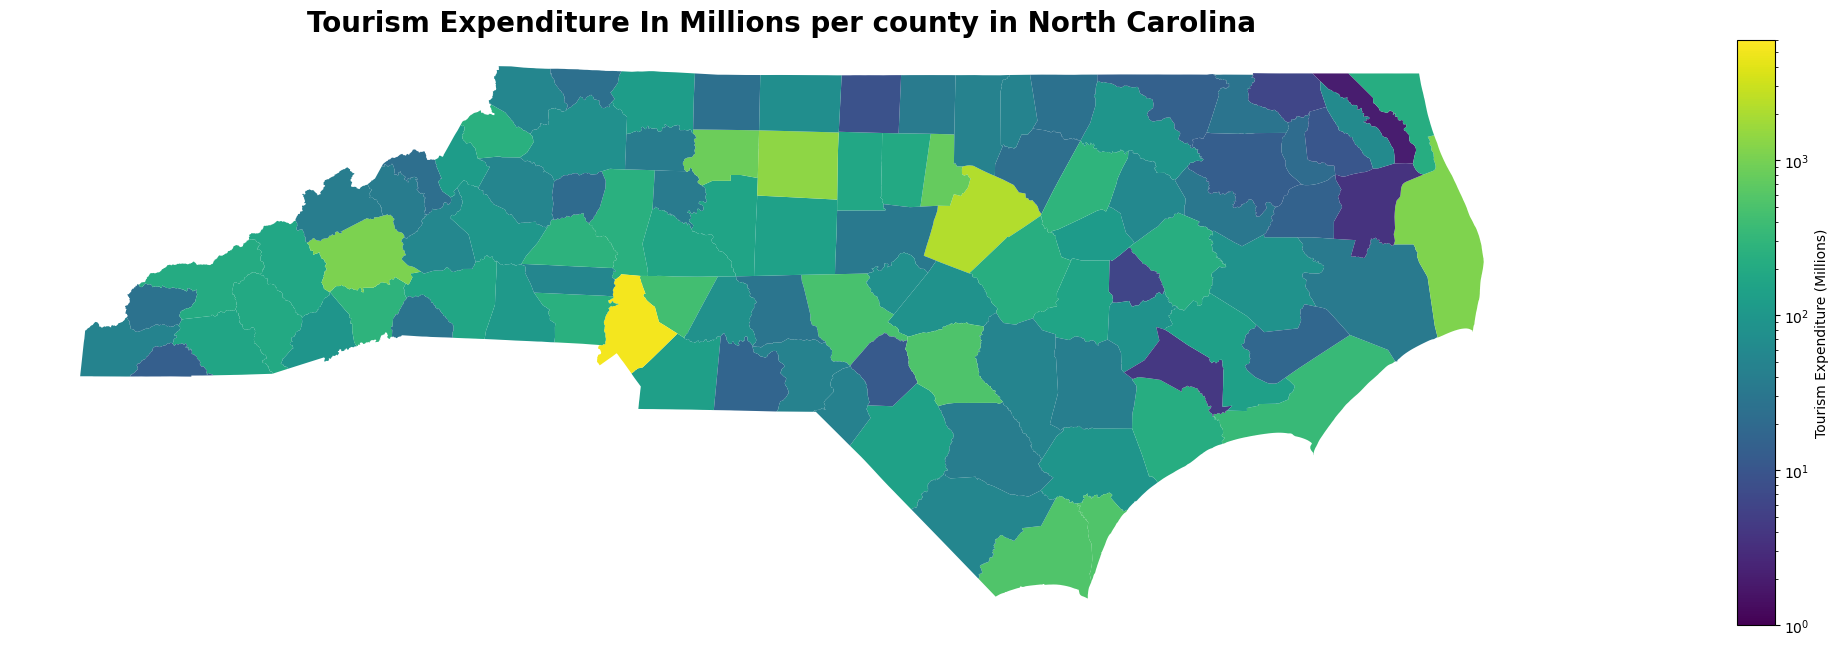

In [193]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Assuming 'econ2016' is a GeoDataFrame
econcol = econ2016.iloc[:, 11]

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2016.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2016', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')


# Save the GeoDataFrame as GeoJSON
econ2016.to_file('tourism_expenditure16.geojson', driver='GeoJSON')


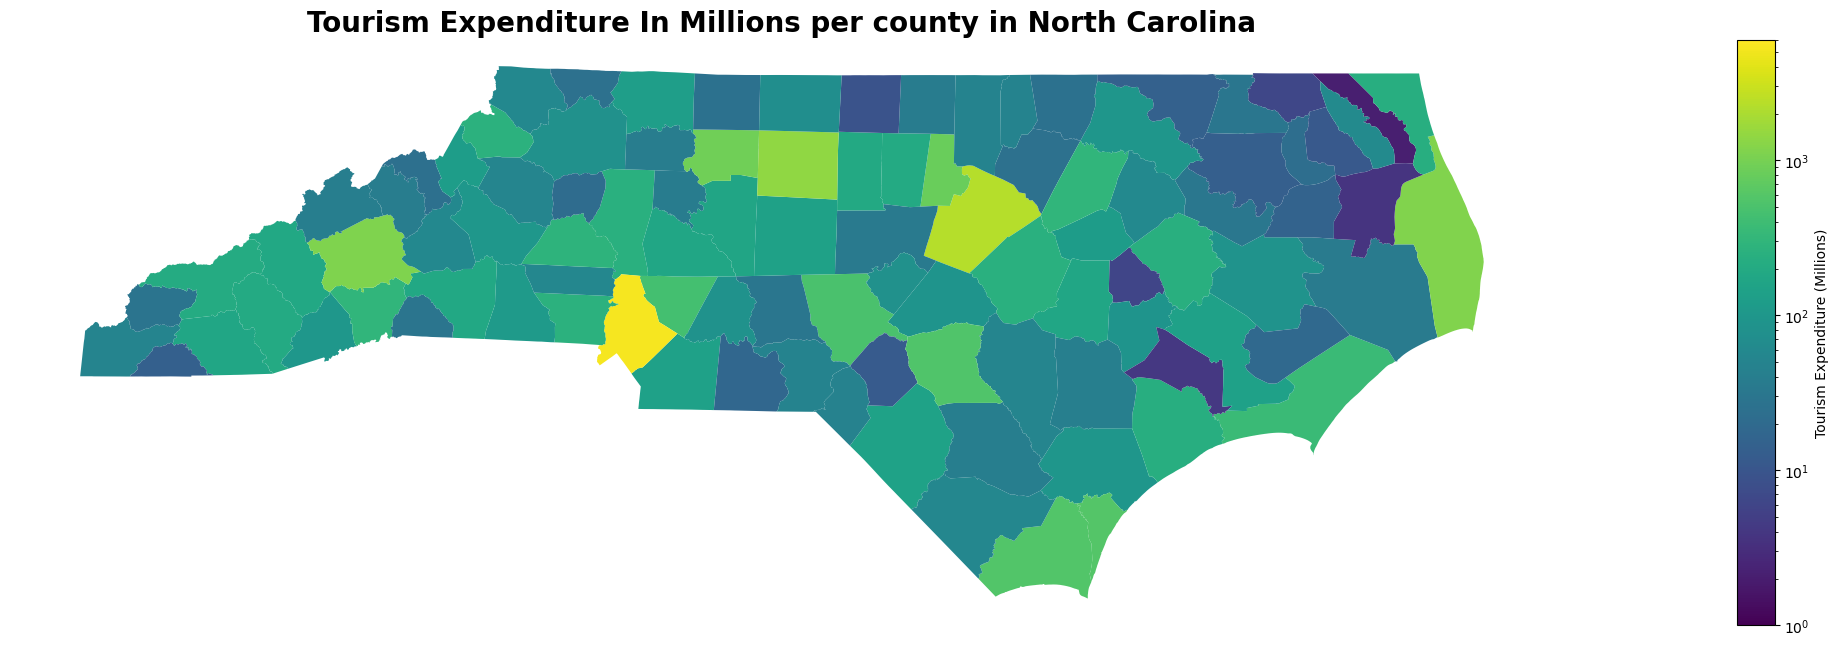

In [142]:

econcol = econ2017.iloc[:, 10]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2017.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()


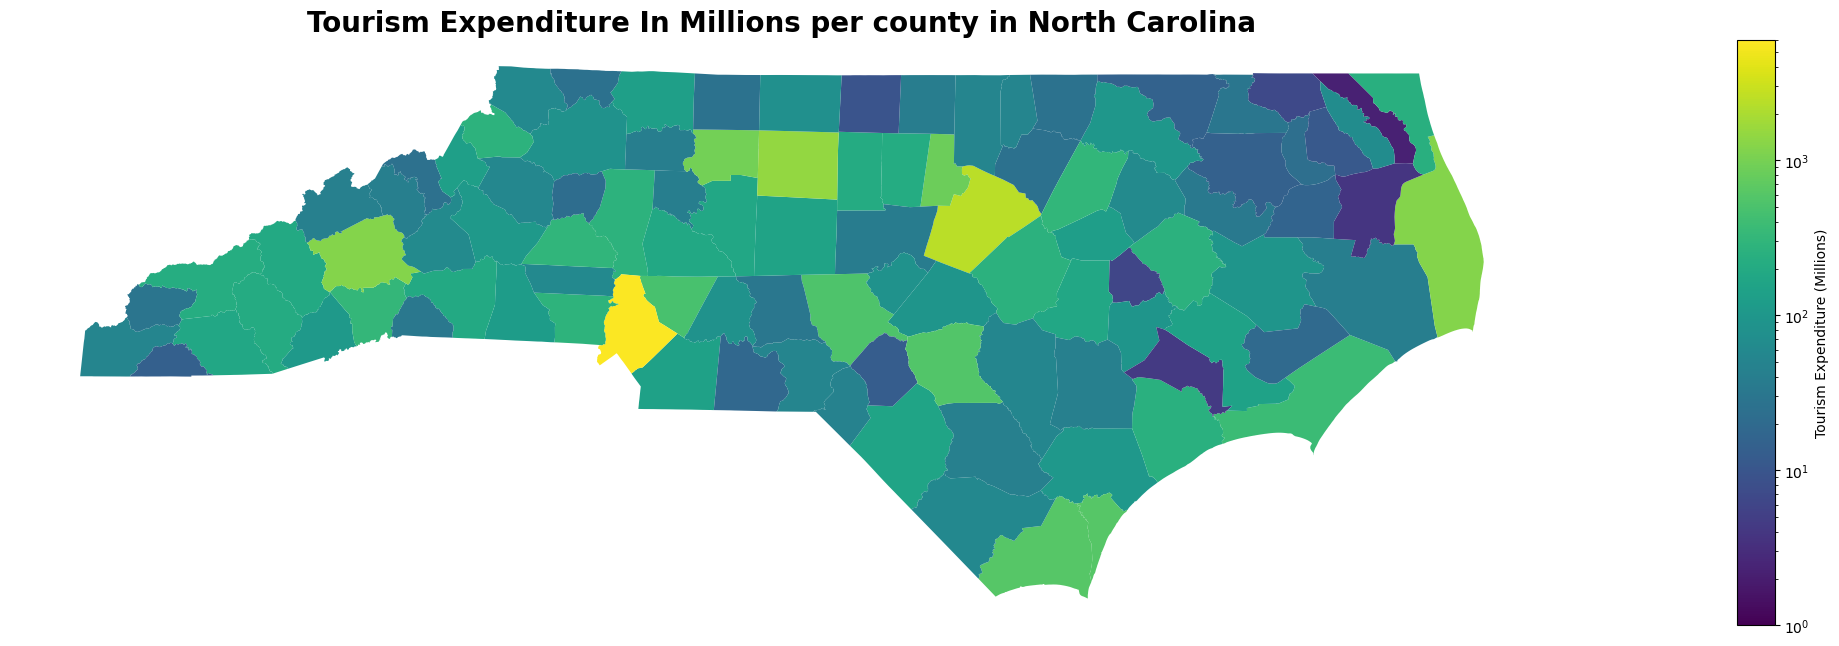

In [143]:
econcol = econ2018.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2018.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2018', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

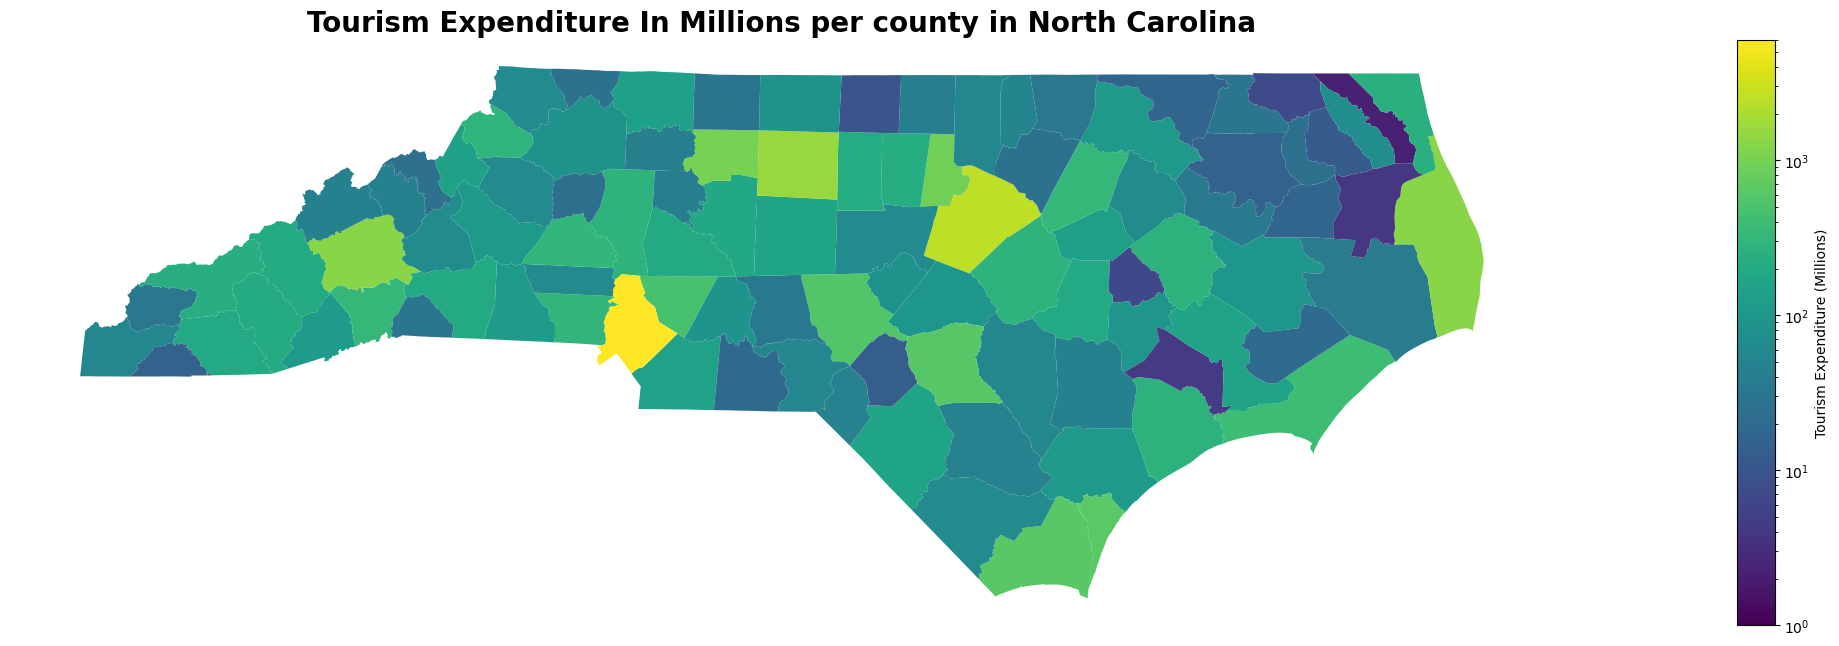

In [144]:
econcol = econ2019.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2019.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2019', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

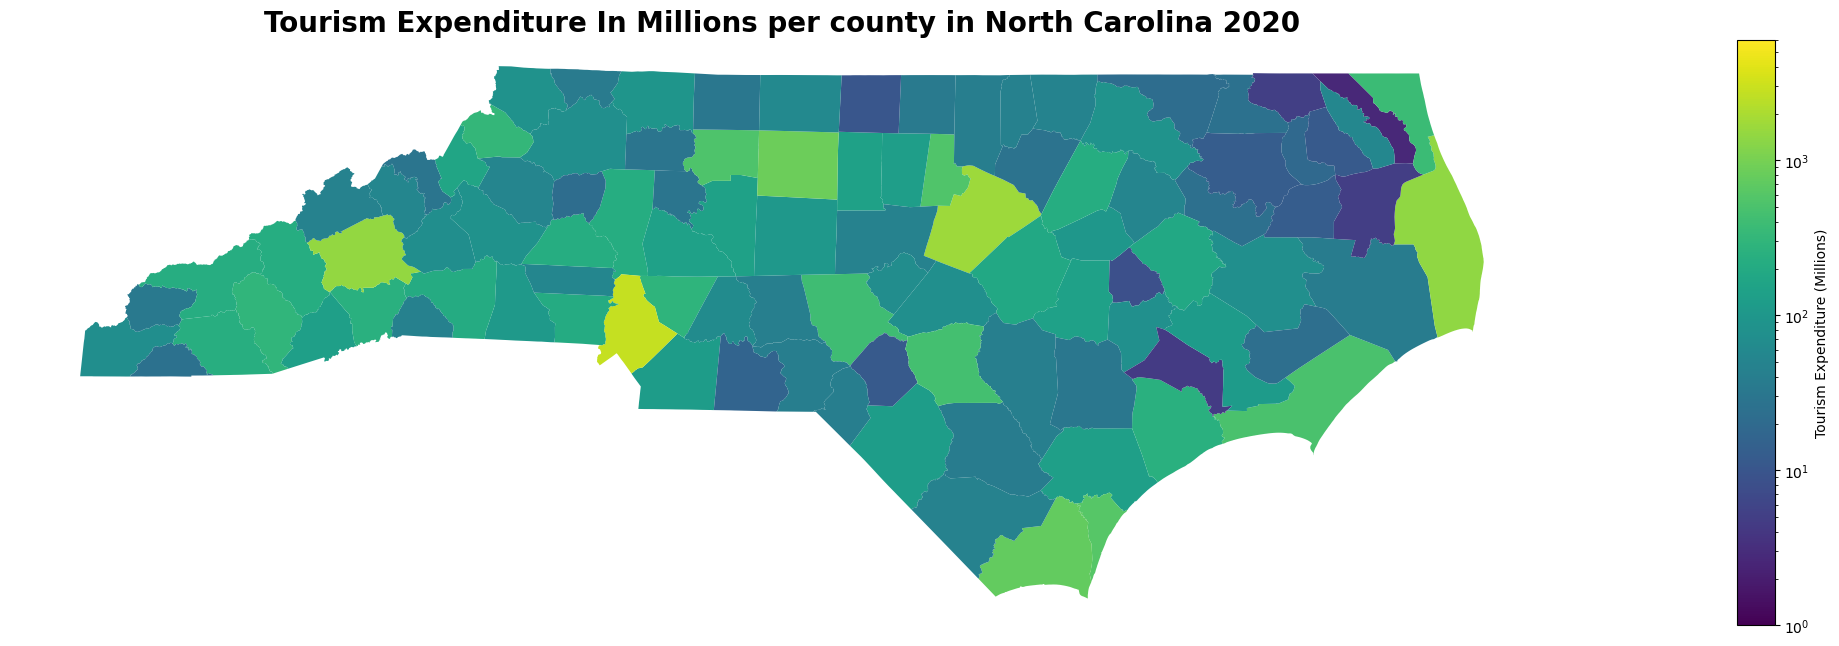

In [214]:
econcol = econ2020.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2020.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2020', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

In [208]:
print(econ2020['color'].unique())

['#ffffff']


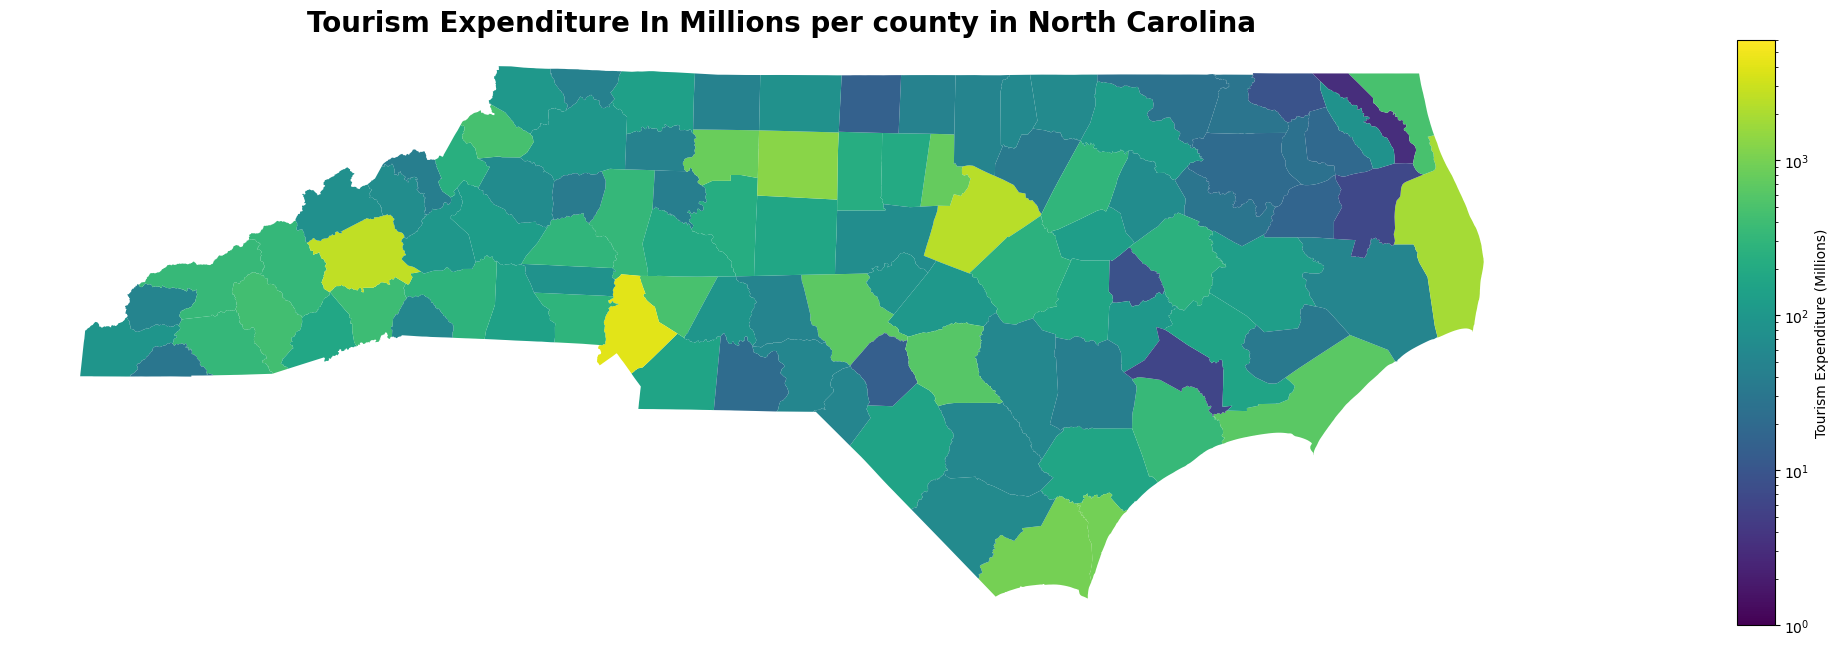

In [146]:
econcol = econ2021.iloc[:, 10]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2021.plot(column=econcol, ax=ax, cmap='viridis', norm=LogNorm(vmin=1, vmax=6000), legend=False)

# Set the title for the plot
ax.set_title('Tourism Expenditure In Millions per county in North Carolina 2021', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=LogNorm(vmin=1, vmax=6000))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Tourism Expenditure (Millions)')

plt.show()

In [147]:
econ2016.columns 



Index(['OBJECTID', 'CO_NAME', 'FIPS', 'Rec_Survey', 'NCGS_url', 'ck_date',
       'Shape__Area', 'Shape__Length', 'GlobalID', 'geometry', 'Rank',
       'Expenditure (Millions) ', 'Percent Change 2015/2016'],
      dtype='object')

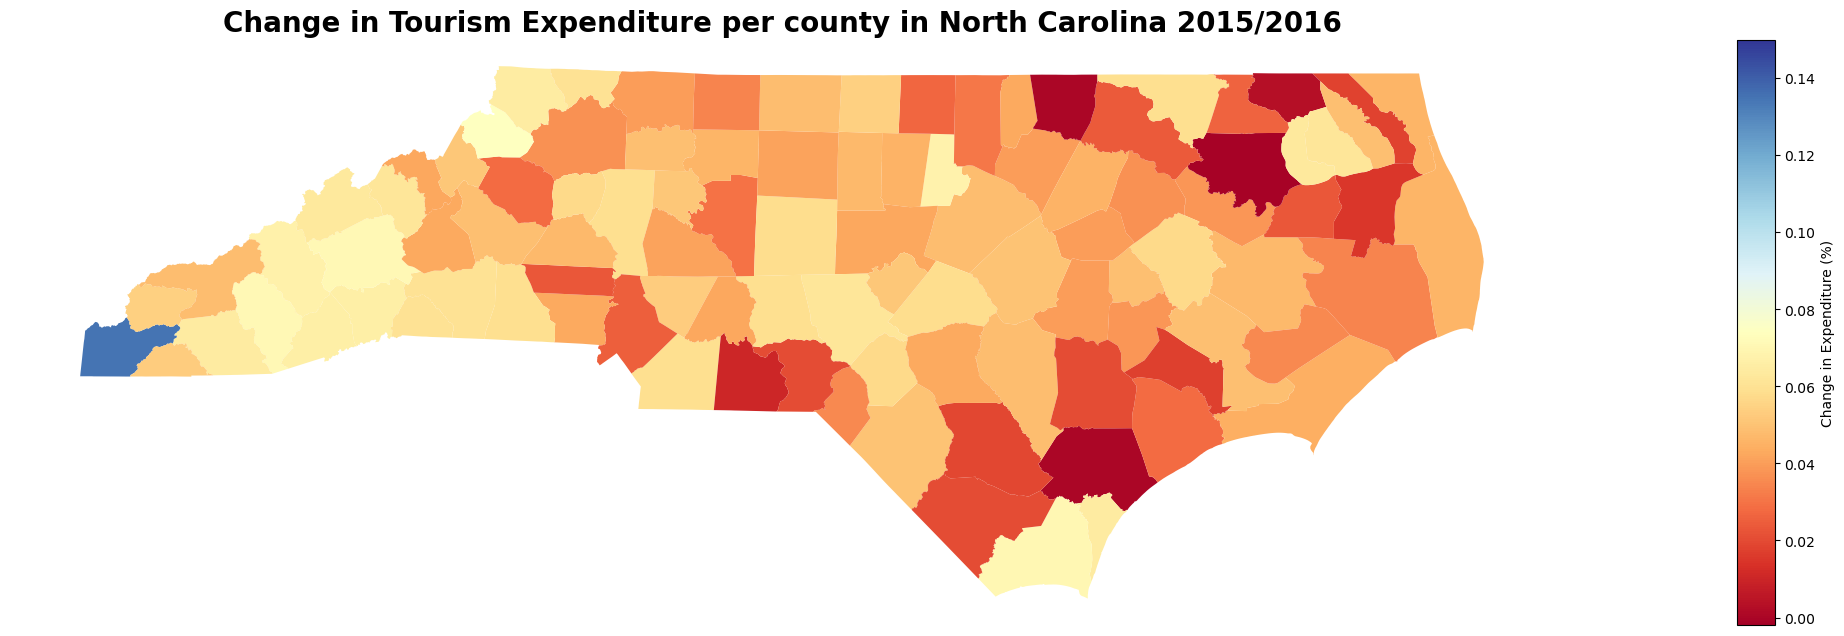

In [148]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming you have already imported the necessary libraries and have your DataFrame 'econ2016'

econcol = econ2016.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2016.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.002, vmax=0.15, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2015/2016', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable with a linear normalization
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.002, vmax=0.15))

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()



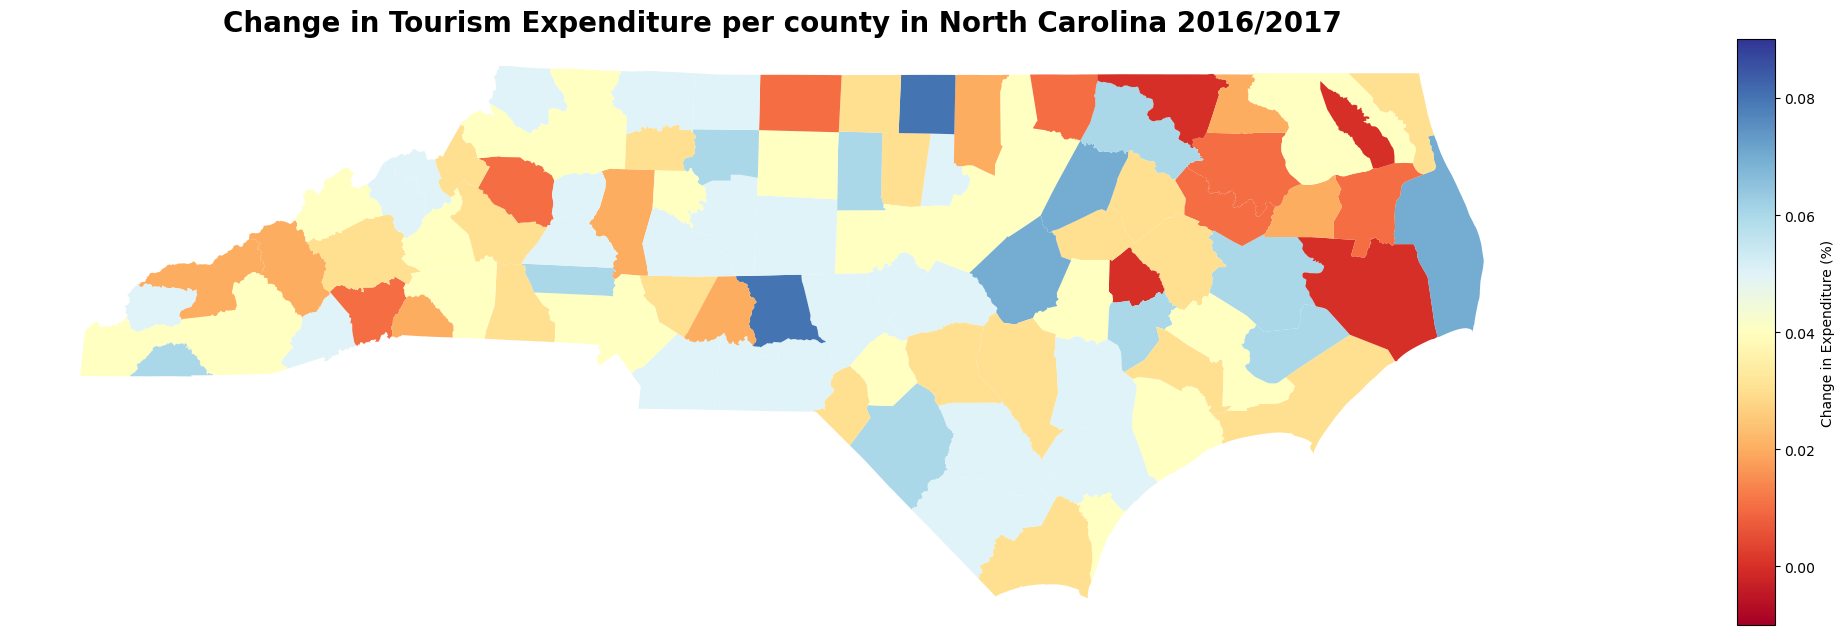

In [150]:
econcol = econ2017.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2017.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.01, vmax=0.09, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2016/2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.01, vmax=0.09))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()


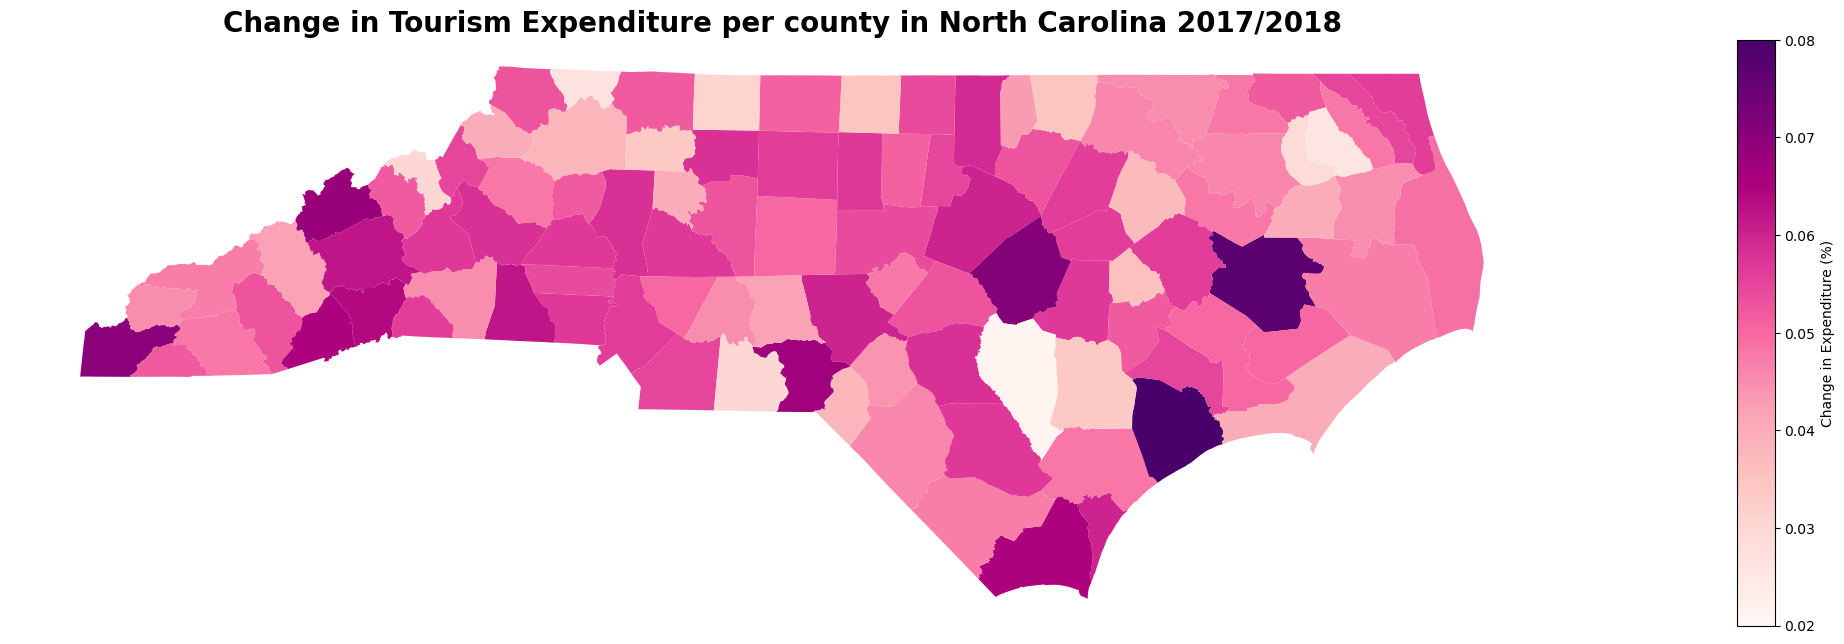

In [151]:
econcol = econ2018.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2018.plot(column=econcol, ax=ax, cmap='RdPu', vmin=0.020, vmax=0.08, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2017/2018', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=0.02, vmax=0.08))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()

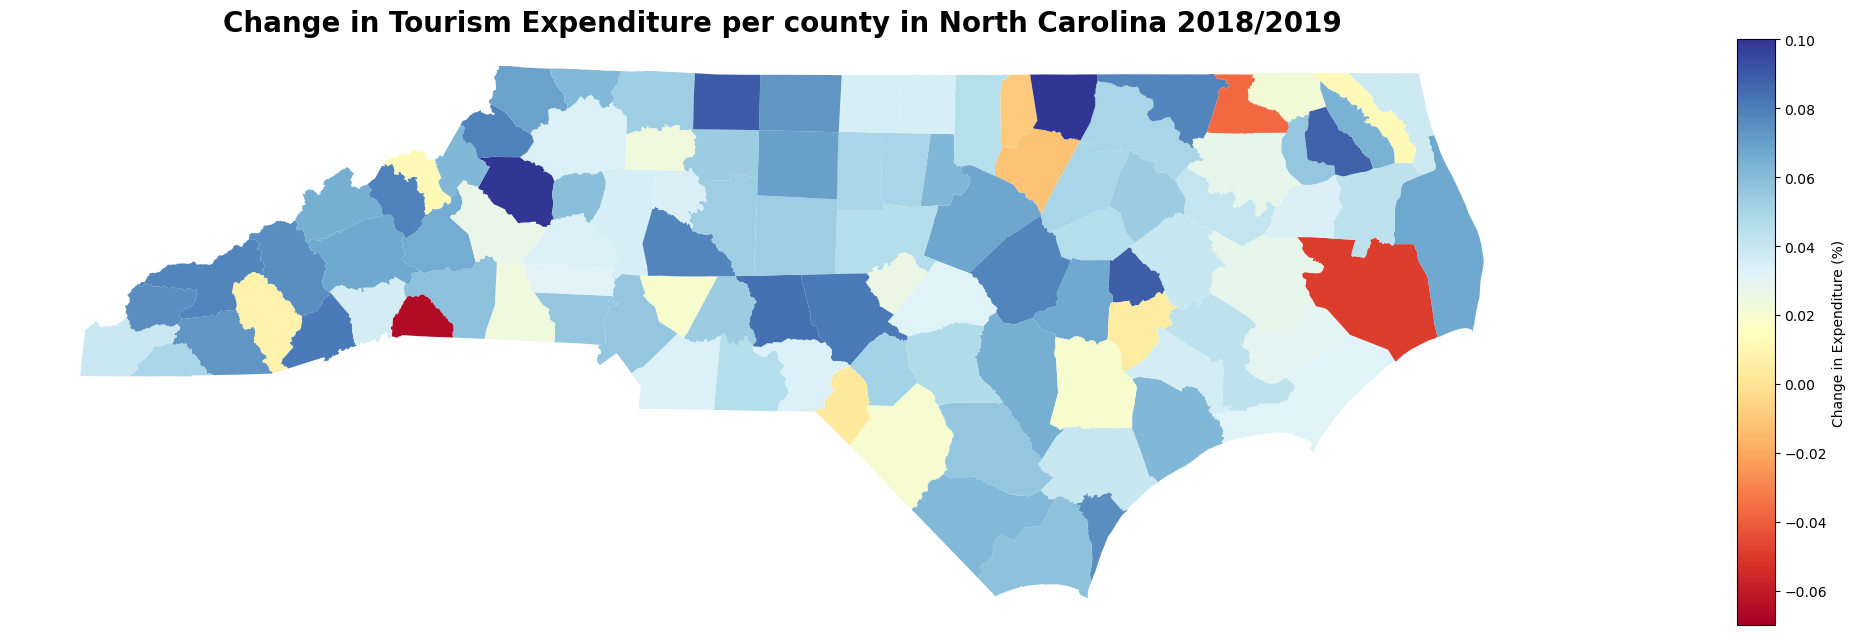

In [152]:
econcol = econ2019.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2019.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.07, vmax=0.1, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2018/2019', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.07, vmax=0.1))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()

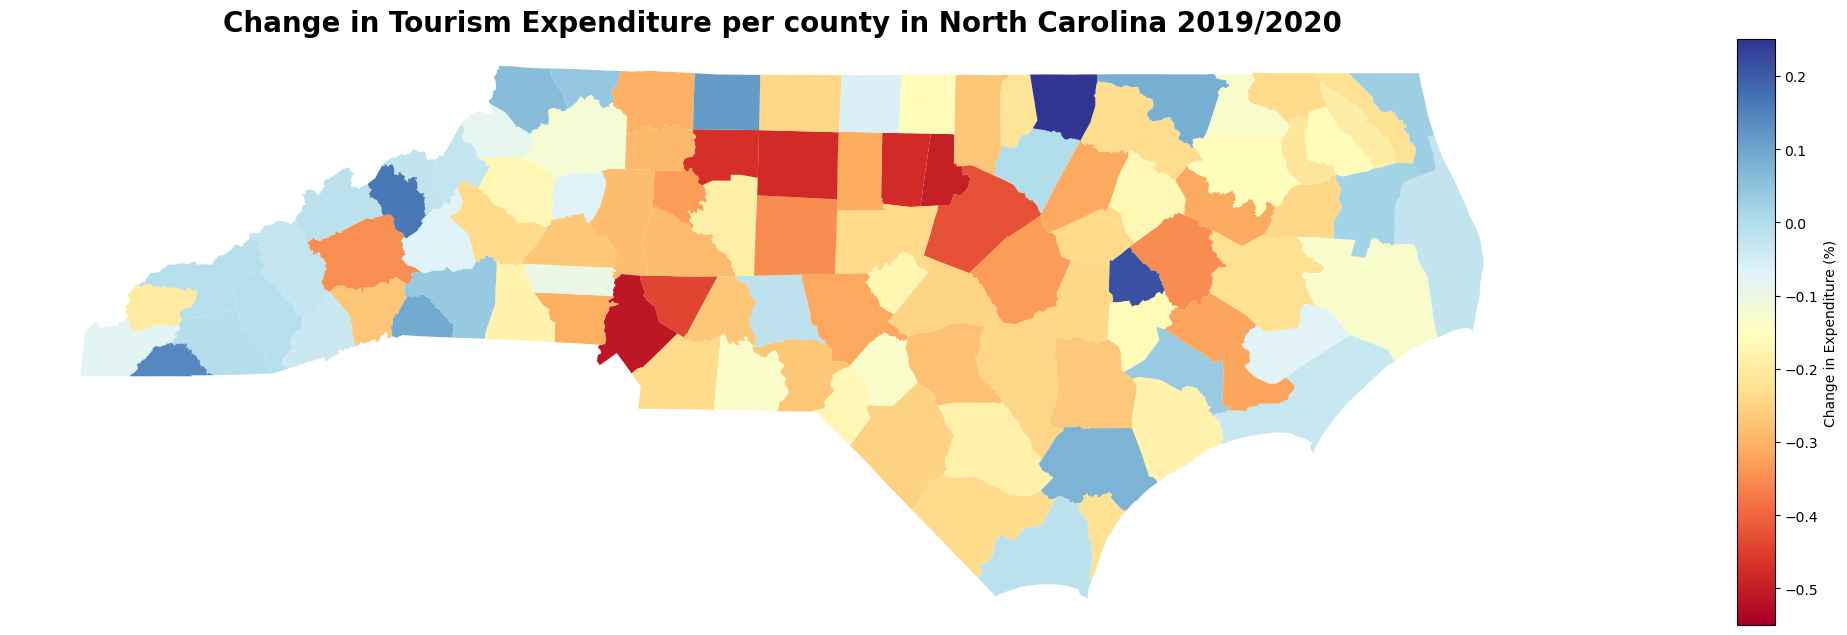

In [153]:

econcol = econ2020.iloc[:, 12]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2020.plot(column=econcol, ax=ax, cmap='RdYlBu', vmin=-0.55, vmax=0.25, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2019/2020', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=-0.55, vmax=0.25))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()


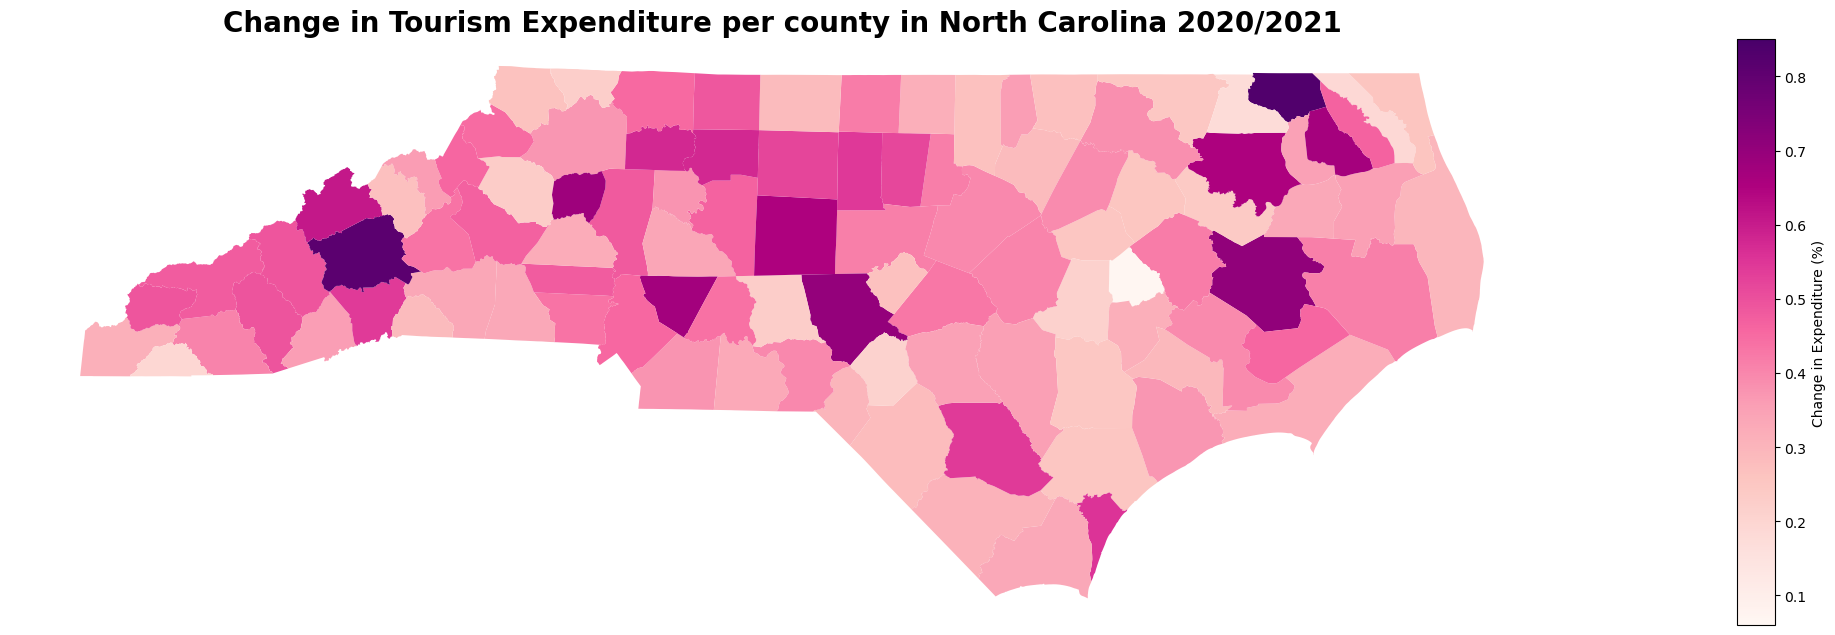

In [154]:

econcol = econ2021.iloc[:, 11]  

fig, ax = plt.subplots(figsize=(25, 9))

# Use the correct plotting method for a DataFrame
im = econ2021.plot(column=econcol, ax=ax, cmap='RdPu', vmin=0.06, vmax=0.85, legend=False)

# Set the title for the plot
ax.set_title('Change in Tourism Expenditure per county in North Carolina 2020/2021', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# Remove the axis
ax.set_axis_off()

# Create a ScalarMappable to set the colorbar
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=0.06, vmax=0.85))
sm.set_array([])  # An empty array is needed for the ScalarMappable

# Position the color bar to the right of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Change in Expenditure (%)')

plt.show()

In [ ]:
pov16

,Label (Grouping),North Carolina!!Total!!Estimate,North Carolina!!Total!!Margin of Error,North Carolina!!Below poverty level!!Estimate,North Carolina!!Below poverty level!!Margin of Error,North Carolina!!Percent below poverty level!!Estimate,North Carolina!!Percent below poverty level!!Margin of Error,Alamance_total,"Alamance County, North Carolina!!Total!!Margin of Error",Alamance_estimate,...,Yadkin_estimate,"Yadkin County, North Carolina!!Below poverty level!!Margin of Error",Yadkin_percentage,"Yadkin County, North Carolina!!Percent below poverty level!!Margin of Error",Yancey_total,"Yancey County, North Carolina!!Total!!Margin of Error",Yancey_estimate,"Yancey County, North Carolina!!Below poverty level!!Margin of Error",Yancey_percentage,"Yancey County, North Carolina!!Percent below poverty level!!Margin of Error"
0,Population for whom poverty status is determined,"9,685,511","±1,782","1,631,704","±17,281",16.8%,±0.2,"152,236",±436,"28,123",...,"7,112","±1,021",19.0%,±2.7,"17,413",±83,"3,713",±587,21.3%,±3.4
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"2,254,721","±2,050","539,417","±8,484",23.9%,±0.4,"35,393",±140,"9,842",...,"2,436",±480,29.6%,±5.9,"3,336",±65,984,±271,29.5%,±8.2
3,Under 5 years,"596,987","±1,014","162,903","±3,325",27.3%,±0.6,"9,136",±79,"2,944",...,678,±166,34.1%,±8.3,818,±64,272,±118,33.3%,±14.4
4,5 to 17 years,"1,657,734","±1,821","376,514","±6,588",22.7%,±0.4,"26,257",±141,"6,898",...,"1,758",±382,28.1%,±6.1,"2,518",±86,712,±219,28.3%,±8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,75 years and over,"212,576","±2,515","42,874","±1,124",20.2%,±0.5,"4,611",±325,748,...,264,±74,22.1%,±5.4,724,±188,247,±93,34.1%,±14.1
64,Mean income deficit for unrelated individuals ...,"6,673",±45,(X),(X),(X),(X),"6,367",±307,(X),...,(X),(X),(X),(X),"5,337",±748,(X),(X),(X),(X)
65,"Worked full-time, year-round in the past 12 mo...","751,688","±8,913","29,263","±1,230",3.9%,±0.2,"9,878",±733,591,...,43,±43,2.1%,±2.2,879,±207,25,±23,2.8%,±2.5
66,"Worked less than full-time, year-round in the ...","420,590","±5,564","187,510","±3,598",44.6%,±0.6,"6,929",±677,"2,877",...,456,±155,43.1%,±11.4,497,±146,161,±69,32.4%,±12.0


In [155]:
xmerged_16= counties.merge(econ2016, how='inner', on='CO_NAME')

merged_2016 = xmerged_16.merge(poverty_sex_perc16, how='inner', on='CO_NAME')

xmerged_17= counties.merge(econ2017, how='inner', on='CO_NAME')
merged_2017= xmerged_17.merge(poverty_sex_perc17, how='inner', on='CO_NAME')

xmerged_18= counties.merge(econ2018, how='inner', on='CO_NAME')
merged_2018= xmerged_18.merge(poverty_sex_perc18, how='inner', on='CO_NAME')

xmerged_19= counties.merge(econ2019, how='inner', on='CO_NAME')
merged_2019= xmerged_19.merge(poverty_sex_perc19, how='inner', on='CO_NAME')

xmerged_20= counties.merge(econ2020, how='inner', on='CO_NAME')
merged_2020= xmerged_20.merge(poverty_sex_perc20, how='inner', on='CO_NAME')

xmerged_21= counties.merge(econ2021, how='inner', on='CO_NAME')
merged_2021= xmerged_21.merge(poverty_sex_perc21, how='inner', on='CO_NAME')

In [156]:
merged_2017

,OBJECTID_x,CO_NAME,FIPS_x,Rec_Survey_x,NCGS_url_x,ck_date_x,Shape__Area_x,Shape__Length_x,GlobalID_x,geometry_x,...,ck_date_y,Shape__Area_y,Shape__Length_y,GlobalID_y,geometry_y,Expenditure (Millions),Expenditure Percent Change 2016/2017,counties,male,female
0,1,CAMDEN,029,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,8.650426e+09,680450.731781,90044997-3e45-4fb9-868b-d63e35ca5417,"POLYGON ((-75.90629 36.08588, -75.90663 36.085...",...,2011-11-29 00:00:00+00:00,8.650426e+09,680450.731781,90044997-3e45-4fb9-868b-d63e35ca5417,"POLYGON ((-75.90629 36.08588, -75.90663 36.085...",2.09,0.04,Camden_percentage,8.1,9.9
1,2,GATES,073,No recent survey data available,,2011-11-29 00:00:00+00:00,9.640705e+09,444604.369559,9481c531-a035-4ef5-b744-7ea6c273dc2f,"POLYGON ((-76.69658 36.29619, -76.69673 36.296...",...,2011-11-29 00:00:00+00:00,9.640705e+09,444604.369559,9481c531-a035-4ef5-b744-7ea6c273dc2f,"POLYGON ((-76.69658 36.29619, -76.69673 36.296...",6.47,0.04,Gates_percentage,8.7,15.9
2,3,IREDELL,097,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.667062e+10,639632.141435,af176728-342a-4e27-98c7-a3618a76f75d,"POLYGON ((-80.94812 35.49117, -80.94835 35.491...",...,2011-11-29 00:00:00+00:00,1.667062e+10,639632.141435,af176728-342a-4e27-98c7-a3618a76f75d,"POLYGON ((-80.94812 35.49117, -80.94835 35.491...",253.72,0.02,Iredell_percentage,10.8,14.5
3,4,WILKES,193,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,2.111175e+10,718209.059123,ff004293-a701-4db2-9992-0746fca95bd3,"POLYGON ((-81.30257 36.00491, -81.30285 36.004...",...,2011-11-29 00:00:00+00:00,2.111175e+10,718209.059123,ff004293-a701-4db2-9992-0746fca95bd3,"POLYGON ((-81.30257 36.00491, -81.30285 36.004...",78.08,0.04,Wilkes_percentage,19.3,22.3
4,5,UNION,179,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.782795e+10,584449.934640,64144070-8f48-4c5f-ac8e-356806056303,"POLYGON ((-80.55036 35.20841, -80.55007 35.208...",...,2011-11-29 00:00:00+00:00,1.782795e+10,584449.934640,64144070-8f48-4c5f-ac8e-356806056303,"POLYGON ((-80.55036 35.20841, -80.55007 35.208...",139.75,0.05,Union_percentage,8.6,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,SURRY,171,No recent survey data available,,2011-11-29 00:00:00+00:00,1.499126e+10,575219.788947,b16703ae-38b8-4e5a-89bc-0df95c91fc07,"POLYGON ((-80.45233 36.24143, -80.45259 36.241...",...,2011-11-29 00:00:00+00:00,1.499126e+10,575219.788947,b16703ae-38b8-4e5a-89bc-0df95c91fc07,"POLYGON ((-80.45233 36.24143, -80.45259 36.241...",125.59,0.05,Surry_percentage,16.2,18.9
96,97,HERTFORD,091,No recent survey data available,,2011-11-29 00:00:00+00:00,1.004846e+10,588862.054851,288b0028-fa86-4b36-99d4-1b0e40c573f5,"POLYGON ((-76.70659 36.24380, -76.70693 36.243...",...,2011-11-29 00:00:00+00:00,1.004846e+10,588862.054851,288b0028-fa86-4b36-99d4-1b0e40c573f5,"POLYGON ((-76.70659 36.24380, -76.70693 36.243...",29.99,0.02,Hertford_percentage,21.2,25.1
97,98,STOKES,169,No recent survey data available,,2011-11-29 00:00:00+00:00,1.270900e+10,453418.519272,19c14f88-a2b2-4fbe-ac8a-58396a51cbae,"POLYGON ((-80.03512 36.25719, -80.03547 36.257...",...,2011-11-29 00:00:00+00:00,1.270900e+10,453418.519272,19c14f88-a2b2-4fbe-ac8a-58396a51cbae,"POLYGON ((-80.03512 36.25719, -80.03547 36.257...",25.42,0.05,Stokes_percentage,11.9,15.7
98,99,ASHE,009,No recent survey data available,,2011-11-29 00:00:00+00:00,1.193919e+10,520045.398397,af0b3578-18ca-468a-be2b-dc3958db6c4f,"POLYGON ((-81.47752 36.24026, -81.48632 36.241...",...,2011-11-29 00:00:00+00:00,1.193919e+10,520045.398397,af0b3578-18ca-468a-be2b-dc3958db6c4f,"POLYGON ((-81.47752 36.24026, -81.48632 36.241...",57.65,0.05,Ashe_percentage,19.8,19.1


In [177]:
for index, col in enumerate(merged_2020):
    print(f"Column Index: {index}, Column Name: {col}")

Column Index: 0, Column Name: OBJECTID_x
Column Index: 1, Column Name: CO_NAME
Column Index: 2, Column Name: FIPS_x
Column Index: 3, Column Name: Rec_Survey_x
Column Index: 4, Column Name: NCGS_url_x
Column Index: 5, Column Name: ck_date_x
Column Index: 6, Column Name: Shape__Area_x
Column Index: 7, Column Name: Shape__Length_x
Column Index: 8, Column Name: GlobalID_x
Column Index: 9, Column Name: geometry_x
Column Index: 10, Column Name: OBJECTID_y
Column Index: 11, Column Name: FIPS_y
Column Index: 12, Column Name: Rec_Survey_y
Column Index: 13, Column Name: NCGS_url_y
Column Index: 14, Column Name: ck_date_y
Column Index: 15, Column Name: Shape__Area_y
Column Index: 16, Column Name: Shape__Length_y
Column Index: 17, Column Name: GlobalID_y
Column Index: 18, Column Name: geometry_y
Column Index: 19, Column Name:  
Column Index: 20, Column Name: Expenditure (millions)
Column Index: 21, Column Name: Percent Change 2019/2020
Column Index: 22, Column Name: counties
Column Index: 23, Colu

In [178]:

index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 23 # Replace with the actual index of 'column2_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2016.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2016.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation16 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2016 is: {correlation16}")
#
index_col1 = 19  # Replace with the actual index of 'column1_index'
index_col2 = 22 # Replace with the actual index of 'column2_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2017.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2017.iloc[:, index_col2], errors='coerce')


correlation17 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2017 is: {correlation17}")
#
index_col1 = 20 
index_col2 = 23

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2018.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2018.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation18 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2018 is: {correlation18}")
#
index_col1 = 20 
index_col2 = 23

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2019.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2019.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation19 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2019 is: {correlation19}")
#
index_col1 = 20  
index_col2 = 23 

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2020.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2020.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation20 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2020 is: {correlation20}")
#
index_col1 = 20
index_col2 = 23 

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2021.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2021.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation21 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of male poverty for NC in 2021 is: {correlation21}")

The correlation between Tourism expenditure and percentage of male poverty for NC in 2016 is: -0.24759651065711125
The correlation between Tourism expenditure and percentage of male poverty for NC in 2017 is: -0.25254370414944904
The correlation between Tourism expenditure and percentage of male poverty for NC in 2018 is: -0.2519208351224731
The correlation between Tourism expenditure and percentage of male poverty for NC in 2019 is: -0.2558629551074334
The correlation between Tourism expenditure and percentage of male poverty for NC in 2020 is: -0.3081071542938772
The correlation between Tourism expenditure and percentage of male poverty for NC in 2021 is: -0.2098310478201732


In [180]:
index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 24 # Replace with the actual index of 'column2_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2016.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2016.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation16 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2016 is: {correlation16}")
#
index_col1 = 19  # Replace with the actual index of 'column1_index'
index_col2 = 23 # Replace with the actual index of 'column2_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2017.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2017.iloc[:, index_col2], errors='coerce')


correlation17 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2017 is: {correlation17}")
#
index_col1 = 20 
index_col2 = 24

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2018.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2018.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation18 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2018 is: {correlation18}")
#
index_col1 = 20
index_col2 = 24

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2019.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2019.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation19 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2019 is: {correlation19}")
#
index_col1 = 20
index_col2 = 24

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2020.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2020.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation20 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2020 is: {correlation20}")
#
index_col1 = 20
index_col2 = 23

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2021.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2021.iloc[:, index_col2], errors='coerce')

# Calculate the correlation between the two columns
correlation21 = column1.corr(column2)

print(f"The correlation between Tourism expenditure and percentage of female poverty for NC in 2021 is: {correlation21}")

The correlation between Tourism expenditure and percentage of female poverty for NC in 2016 is: -0.2677337233600382
The correlation between Tourism expenditure and percentage of female poverty for NC in 2017 is: -0.2790348831790139
The correlation between Tourism expenditure and percentage of female poverty for NC in 2018 is: -0.27191192908164413
The correlation between Tourism expenditure and percentage of female poverty for NC in 2019 is: -0.273044515706162
The correlation between Tourism expenditure and percentage of female poverty for NC in 2020 is: -0.3441835518858962
The correlation between Tourism expenditure and percentage of female poverty for NC in 2021 is: -0.2098310478201732


 this means a weak negative relationship between poverty in and tourism expenditure 

In [188]:
for index, col in enumerate(merged_2018):
    print(f"Column Index: {index}, Column Name: {col}")

Column Index: 0, Column Name: OBJECTID_x
Column Index: 1, Column Name: CO_NAME
Column Index: 2, Column Name: FIPS_x
Column Index: 3, Column Name: Rec_Survey_x
Column Index: 4, Column Name: NCGS_url_x
Column Index: 5, Column Name: ck_date_x
Column Index: 6, Column Name: Shape__Area_x
Column Index: 7, Column Name: Shape__Length_x
Column Index: 8, Column Name: GlobalID_x
Column Index: 9, Column Name: geometry_x
Column Index: 10, Column Name: OBJECTID_y
Column Index: 11, Column Name: FIPS_y
Column Index: 12, Column Name: Rec_Survey_y
Column Index: 13, Column Name: NCGS_url_y
Column Index: 14, Column Name: ck_date_y
Column Index: 15, Column Name: Shape__Area_y
Column Index: 16, Column Name: Shape__Length_y
Column Index: 17, Column Name: GlobalID_y
Column Index: 18, Column Name: geometry_y
Column Index: 19, Column Name: Unnamed: 0
Column Index: 20, Column Name: Expenditure (Millions)
Column Index: 21, Column Name: Percent Change 2017/2018
Column Index: 22, Column Name: counties
Column Index:

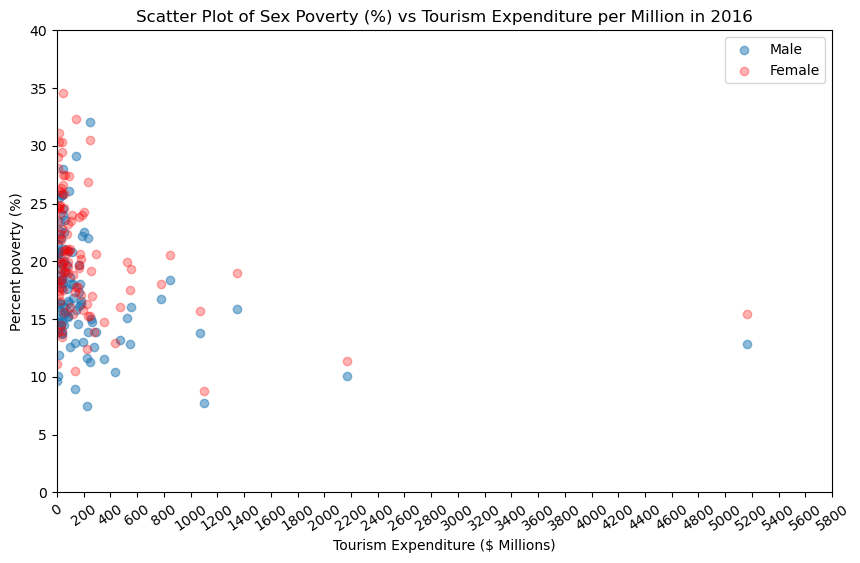

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the three columns using their index positions
index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 23 # Replace with the actual index of 'column2_index'
index_col3 = 24  # Replace with the actual index of 'column3_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2016.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2016.iloc[:, index_col2], errors='coerce')
column3 = pd.to_numeric(merged_2016.iloc[:, index_col3], errors='coerce')

plt.figure(figsize=(10,6))
# Create a scatter plot for column 1 vs column 2
plt.scatter(column1, column2, alpha=0.5, label='Male')

# Add a scatter plot for column 1 vs column 3 in red
plt.scatter(column1, column3, color='red', alpha=0.3, label='Female')

# Customize the plot
plt.title('Scatter Plot of Sex Poverty (%) vs Tourism Expenditure per Million in 2016')
plt.xlabel('Tourism Expenditure ($ Millions)')
plt.ylabel('Percent poverty (%)')
plt.ylim(0, 40)
plt.xlim(0,5800)
plt.xticks(rotation=34)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=35)  # Set the number of tick marks
# Show legend
plt.legend()

# Show the plot
plt.show()



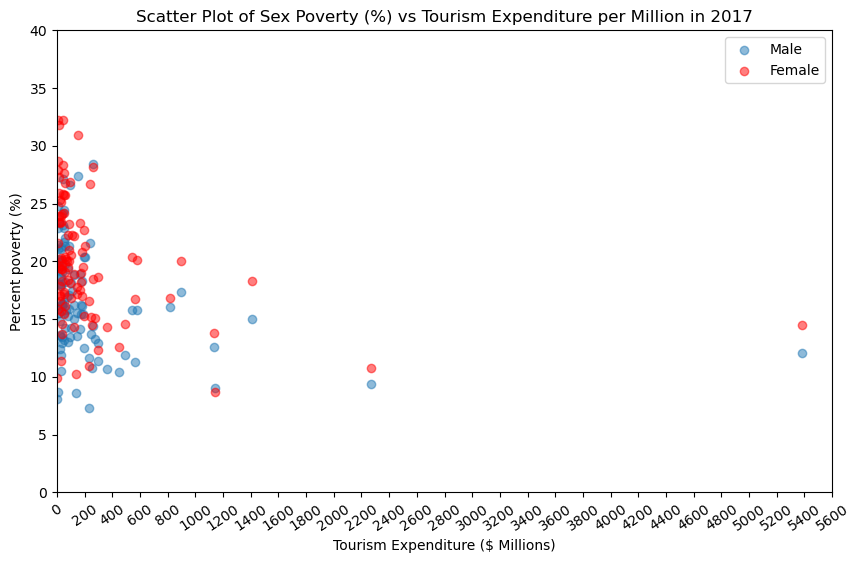

In [187]:
# Get the three columns using their index positions
index_col1 = 19  # Replace with the actual index of 'column1_index'
index_col2 = 22  # Replace with the actual index of 'column2_index'
index_col3 = 23  # Replace with the actual index of 'column3_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2017.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2017.iloc[:, index_col2], errors='coerce')
column3 = pd.to_numeric(merged_2017.iloc[:, index_col3], errors='coerce')

plt.figure(figsize=(10, 6))
# Create a scatter plot for column 1 vs column 2
plt.scatter(column1, column2, alpha=0.5, label='Male')

# Add a scatter plot for column 1 vs column 3 in red
plt.scatter(column1, column3, color='red', alpha=0.5, label='Female')

# Customize the plot
plt.title('Scatter Plot of Sex Poverty (%) vs Tourism Expenditure per Million in 2017')
plt.xlabel('Tourism Expenditure ($ Millions)')
plt.ylabel('Percent poverty (%)')
plt.ylim(0, 40)
plt.xlim(0,5600)
plt.xticks(rotation=34)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=35)  # Set the number of tick marks

# Show legend
plt.legend()

# Show the plot
plt.show()


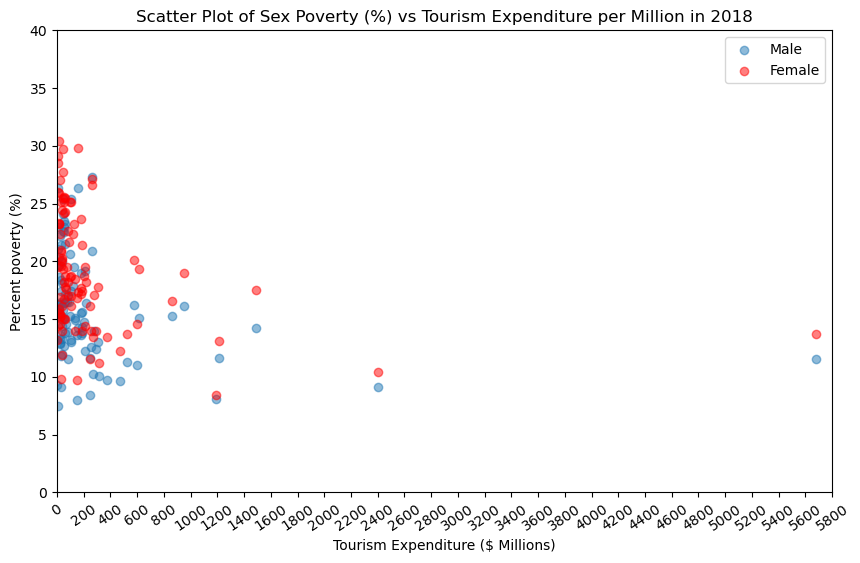

In [189]:
# Get the three columns using their index positions
index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 23  # Replace with the actual index of 'column2_index'
index_col3 = 24  # Replace with the actual index of 'column3_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2018.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2018.iloc[:, index_col2], errors='coerce')
column3 = pd.to_numeric(merged_2018.iloc[:, index_col3], errors='coerce')

plt.figure(figsize=(10, 6))

# Create a scatter plot for column 1 vs column 2
plt.scatter(column1, column2, alpha=0.5, label='Male')

# Add a scatter plot for column 1 vs column 3 in red
plt.scatter(column1, column3, color='red', alpha=0.5, label='Female')

# Customize the plot
plt.title('Scatter Plot of Sex Poverty (%) vs Tourism Expenditure per Million in 2018')
plt.xlabel('Tourism Expenditure ($ Millions)')
plt.ylabel('Percent poverty (%)')
plt.ylim(0, 40)
plt.xlim(0,5800)
plt.xticks(rotation=34)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=35)  # Set the number of tick marks
# Show legend
plt.legend()

# Show the plot
plt.show()

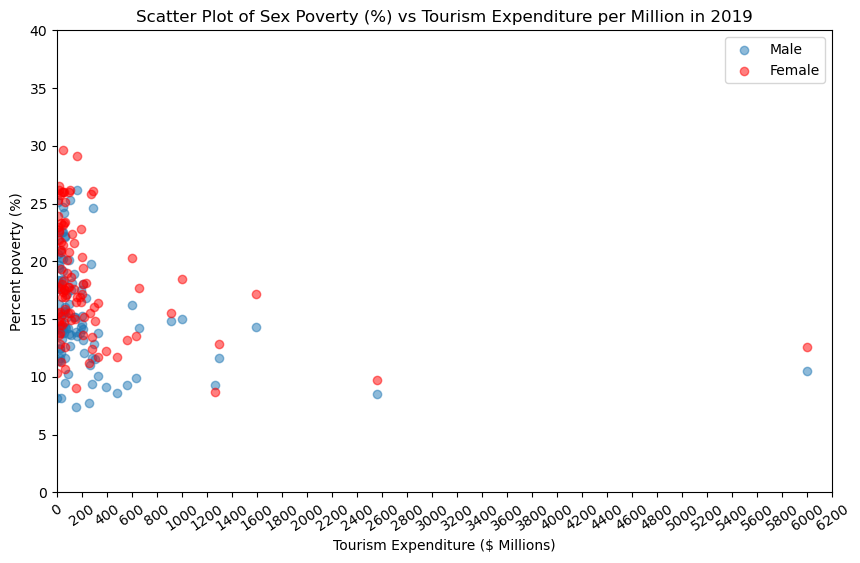

In [190]:
# Get the three columns using their index positions
index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 23  # Replace with the actual index of 'column2_index'
index_col3 = 24  # Replace with the actual index of 'column3_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2019.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2019.iloc[:, index_col2], errors='coerce')
column3 = pd.to_numeric(merged_2019.iloc[:, index_col3], errors='coerce')

plt.figure(figsize=(10, 6))
# Create a scatter plot for column 1 vs column 2
plt.scatter(column1, column2, alpha=0.5, label='Male')

# Add a scatter plot for column 1 vs column 3 in red
plt.scatter(column1, column3, color='red', alpha=0.5, label='Female')

# Customize the plot
plt.title('Scatter Plot of Sex Poverty (%) vs Tourism Expenditure per Million in 2019')
plt.xlabel('Tourism Expenditure ($ Millions)')
plt.ylabel('Percent poverty (%)')
plt.ylim(0, 40)
plt.xlim(0, 6200)
plt.xticks(rotation=34)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=35)  # Set the number of tick marks
# Show legend
plt.legend()

# Show the plot
plt.show()

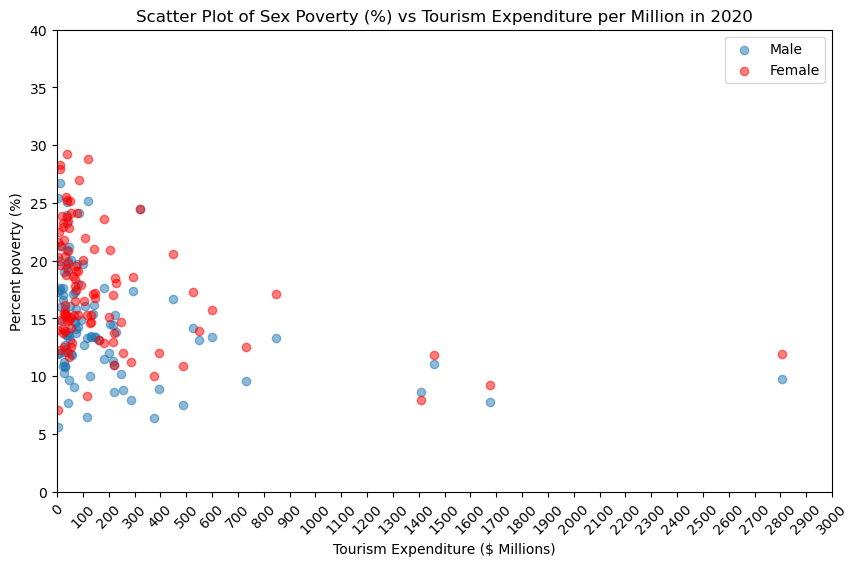

In [191]:
# Get the three columns using their index positions
index_col1 = 20  # Replace with the actual index of 'column1_index'
index_col2 = 23  # Replace with the actual index of 'column2_index'
index_col3 = 24  # Replace with the actual index of 'column3_index'

# Convert columns to numeric type
column1 = pd.to_numeric(merged_2020.iloc[:, index_col1], errors='coerce')
column2 = pd.to_numeric(merged_2020.iloc[:, index_col2], errors='coerce')
column3 = pd.to_numeric(merged_2020.iloc[:, index_col3], errors='coerce')

plt.figure(figsize=(10, 6))

# Create a scatter plot for column 1 vs column 2
plt.scatter(column1, column2, alpha=0.5, label='Male')

# Add a scatter plot for column 1 vs column 3 in red
plt.scatter(column1, column3, color='red', alpha=0.5, label='Female')

# Customize the plot
plt.title('Scatter Plot of Sex Poverty (%) vs Tourism Expenditure per Million in 2020')
plt.xlabel('Tourism Expenditure ($ Millions)')
plt.ylabel('Percent poverty (%)')
plt.ylim(0, 40)
plt.xlim(0,3000)
plt.xscale('linear')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.locator_params(axis='x', nbins=35)  # Set the number of tick marks
# Show legend
plt.legend()

# Show the plot
plt.show()